# Examine gridded sea ice data

Paul Montesano  
July 2024  

**Goal:**  

**Motivation:**  

**Resources:**  
- Walsh et al 2019 Gridded Monthly Sea Ice Extent and Concentration:  
        - direct download: https://noaadata.apps.nsidc.org/NOAA/G10010_V2/  
        - source: https://nsidc.org/data/g10010/versions/2  
        - user guide: https://nsidc.org/sites/default/files/g10010_v0020_1_0.pdf  
```text
Walsh, J. E., Chapman, W. L., Fetterer, F. & Stewart, J. S. (2019). Gridded Monthly Sea Ice Extent and Concentration, 1850 Onward, Version 2 [Data Set]. Boulder, Colorado USA. National Snow and Ice Data Center. https://doi.org/10.7265/jj4s-tq79. Date Accessed 07-03-2024.
```

- NOAA Monthly & Daily Sea Ice Extent and Concentration  
        - https://nsidc.org/data/seaice_index/data-and-image-archive  
        - https://nsidc.org/sites/default/files/g02135-v003-userguide_1_1.pdf

In [1]:
import xarray as xr
import pandas as pd
import geopandas as gpd

In [2]:
ds = xr.open_dataset('/projects/my-public-bucket/databank/sea_ice/G10010_sibt1850_v2.0.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:          (latitude: 240, longitude: 1440, time: 2016)
Coordinates:
  * latitude         (latitude) float32 89.88 89.62 89.38 ... 30.62 30.38 30.12
  * longitude        (longitude) float32 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * time             (time) object 1850-01-15 00:00:00 ... 2017-12-15 00:00:00
Data variables:
    seaice_conc      (time, latitude, longitude) uint8 ...
    seaice_source    (time, latitude, longitude) uint8 ...
    LandRegion_mask  (latitude, longitude) uint8 ...
    Gridcell_Area    (latitude) float32 ...
Attributes:
    version:       2.0
    release_date:  February 28, 2019
    Conventions:   CF-1.4
    citation:      https://doi.org/10.1111/j.1931-0846.2016.12195.x
    dataset_doi:   https://nsidc.org/data/g10010

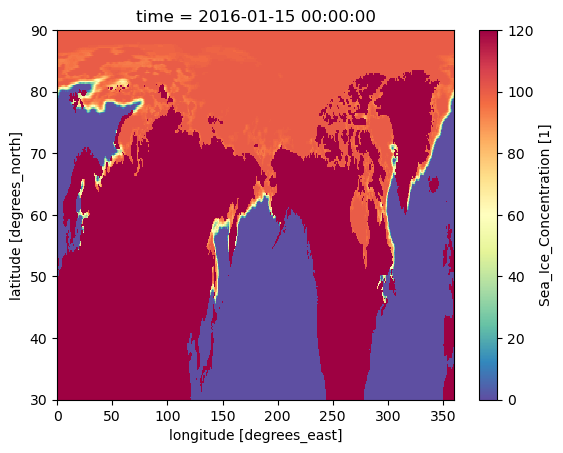

In [5]:
ds.seaice_conc.sel({'time':'2016-01'}).plot(cmap='Spectral_r')

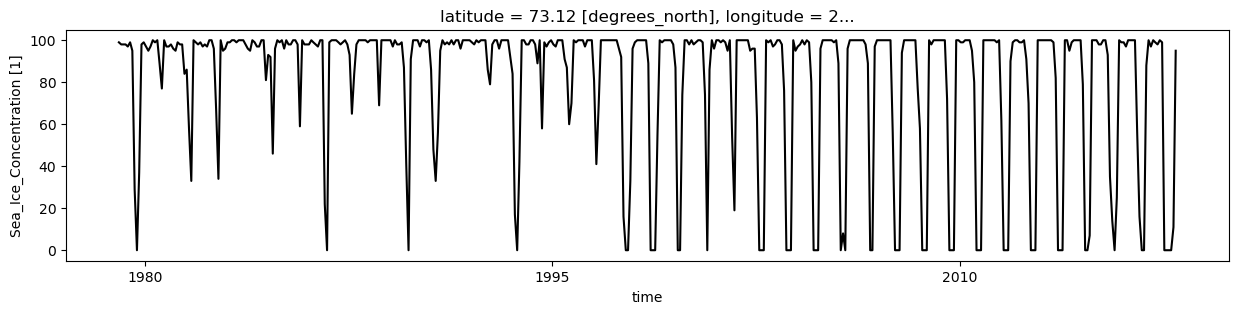

In [10]:
# Line plot of all models (bands) for a single lat lon
ds.seaice_conc.sel(latitude=73, longitude=200, method='nearest').sel(time=slice('1979','2020')).plot.line( x="time", add_legend=True, figsize=(15,3), color='black', alpha=1)